# Analyzing Utah Avalanche Data

**Participant ID:**  
**Date / Time:**

## Introduction
Welcome to our data analysis study. For this part of the study, you'll be working with a dataset sourced from the [Utah Avalanche Center](https://utahavalanchecenter.org/). The data provides insights into [avalanche occurrences](https://utahavalanchecenter.org/avalanches) in Utah.

- You will use pandas to complete **data cleanup and manipulation** tasks. 
- Carefully follow the step-by-step instructions provided for each task.
- Pandas is set up and ready for use, along with other Python libraries such as Matplotlib, Seaborn, and Altair for data visualization.
- You are allowed to use internet resources like documentation and forums, including Stack Overflow, to assist you in completing the tasks.
- In some cases, you will be asked to document your findings. Please do this in writing in a markdwon cell.
- As you work through the tasks, take note of any interesting findings or challenges with the software or pandas that you may encounter, either by speaking your thoughts out loud or taking notes in a markdown cell.
- Feel free to add new code and markdown cells in the notebook as necessary to complete the tasks.

**Support**
- If you require assistance or need further clarification on any of the tasks, please let us know.
- If you find yourself stuck on a task and feel that you will not make any progress, you have the option to skip the task.
- For tasks that build upon the outputs of previous tasks, skipping a task will affect your ability to proceed. To avoid such problems we will assist you loading a fallback dataset. 

In [1]:
import helpers as h
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

import persist_ext as PR

## Data Description

The table below describes the different columns in the dataset. Each row in the dataset represents a reported avalanche with details on location, trigger, and aspect. The data spans multiple years, starting from 2004 up to 2023.

| Column          | Description                                                    |
|-----------------|----------------------------------------------------------------|
| Date            | Date on which the avalanche was recorded                       |
| Region          | Region in Utah where the avalanche occurred                    |
| Place           | Exact location where the avalanche was recorded                |
| Trigger         | Cause of the avalanche                                         |
| Weak Layer      | Layer of snow that was weakest and likely to fail              |
| Depth_inches    | Depth of the avalanche in inches                               |
| Width_inches    | Width of the avalanche in inches                               |
| Vertical_inches | Vertical distance covered by the avalanche in inches           |
| Aspect          | Direction of the slope where the avalanche occurred            |
| Elevation_feet  | Elevation of the location in feet                              |
| Coordinates     | Approximate geographical coordinates of the avalanche location |
| Comments 1      | Additional comments provided by the reporter                   |

In [2]:
df = pd.read_csv('./avalanches_data.csv')
df

,Date,;Region,Place,;Trigger,;Weak Layer,Depth_inches,Width_inches,Vertical_inches,;Aspect,Elevation_feet,Coordinates,Comments 1
0,11/9/2012,Salt Lake,Sunset Peak,Snowboarder,New Snow/Old Snow Interface,14.0,960.0,360.0,North,10400.0,"40.577977000000, -111.595817000000",While it was a small avalanche that was I caug...
1,11/11/2012,Salt Lake,Patsy Marly,Skier,New Snow/Old Snow Interface,30.0,1200.0,1200.0,North,9700.0,"40.592619000000, -111.616099000000",A North facing aspect with an exposed ridge in...
2,11/11/2012,Salt Lake,Two Dogs,Skier,Facets,36.0,840.0,5400.0,North,10200.0,"40.599291000000, -111.642315000000",Remotely triggered all the new storm snow (abo...
3,11/11/2012,Salt Lake,Emma Ridges,Skier,New Snow,"18.0""",600.0,6000.0,Southeast,10200.0,"40.598313000000, -111.628304000000",Impressive fast powder cloud ran in front of t...
4,11/11/2012,Salt Lake,Sunset Peak,Skier,Facets,42.0,18000.0,9600.0,North,10400.0,"40.578590000000, -111.595087000000",Three of us toured from Brighton to low saddle...
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,4/22/2023,Salt Lake,Cardiff Bowl,Unknown,New Snow/Old Snow Interface,8.0,720.0,1800.0,East,9800.0,"40.592721660567, -111.649613218710",We spent the day skiing the southerly-facing a...
2388,4/22/2023,Logan,"Miller Bowl, East",Snowmobiler,New Snow/Old Snow Interface,18.0,540.0,4800.0,North,8700.0,"41.886233332343, -111.645074831510","Not sure about the story here, but we observed..."
2389,4/22/2023,Logan,Millville Peak,Snowboarder,New Snow/Old Snow Interface,12.0,3600.0,7200.0,North,8900.0,"41.677564539953, -111.718065248970",Details are a bit limited and we're not sure w...
2390,5/7/2023,Salt Lake,Red Top Mountain,Natural,Unknown,72.0,3000.0,12000.0,West,10800.0,"40.546874131921, -111.663880335390",Saw this avalanche around 9.30 AM from the top...


# Task 1: Column Names and Data Types

In the first task we will perform some basic data cleaning operations to get our dataset ready for further tasks.

### **Task 1a: Remove Columns**

Remove the follwoing columns to streamline the dataset for further analysis:
- **_Comments 1:_** Contains textual comments not crucial for quantitative analysis.
- **_Coordinates:_** Detailed location data not needed for the current scope of analysis.

#### **Instructions**
1. **Column Removal:**
	- Remove the specified columns using Pandas commands.
2. **Generate dataframe:**
	- Assign the modified dataframe to variable `df_task_1a`
3. **Show Output:**
	- Print the head of `df_task_1a` to show the changes.

In [5]:
df.head()


,Date,;Region,Place,;Trigger,;Weak Layer,Depth_inches,Width_inches,Vertical_inches,;Aspect,Elevation_feet,Coordinates,Comments 1
0,11/9/2012,Salt Lake,Sunset Peak,Snowboarder,New Snow/Old Snow Interface,14.0,960.0,360.0,North,10400.0,"40.577977000000, -111.595817000000",While it was a small avalanche that was I caug...
1,11/11/2012,Salt Lake,Patsy Marly,Skier,New Snow/Old Snow Interface,30.0,1200.0,1200.0,North,9700.0,"40.592619000000, -111.616099000000",A North facing aspect with an exposed ridge in...
2,11/11/2012,Salt Lake,Two Dogs,Skier,Facets,36.0,840.0,5400.0,North,10200.0,"40.599291000000, -111.642315000000",Remotely triggered all the new storm snow (abo...
3,11/11/2012,Salt Lake,Emma Ridges,Skier,New Snow,"18.0""",600.0,6000.0,Southeast,10200.0,"40.598313000000, -111.628304000000",Impressive fast powder cloud ran in front of t...
4,11/11/2012,Salt Lake,Sunset Peak,Skier,Facets,42.0,18000.0,9600.0,North,10400.0,"40.578590000000, -111.595087000000",Three of us toured from Brighton to low saddle...


In [8]:
df = df.drop("Coordinates", axis=1)

In [9]:
df.head()

,Date,;Region,Place,;Trigger,;Weak Layer,Depth_inches,Width_inches,Vertical_inches,;Aspect,Elevation_feet
0,11/9/2012,Salt Lake,Sunset Peak,Snowboarder,New Snow/Old Snow Interface,14.0,960.0,360.0,North,10400.0
1,11/11/2012,Salt Lake,Patsy Marly,Skier,New Snow/Old Snow Interface,30.0,1200.0,1200.0,North,9700.0
2,11/11/2012,Salt Lake,Two Dogs,Skier,Facets,36.0,840.0,5400.0,North,10200.0
3,11/11/2012,Salt Lake,Emma Ridges,Skier,New Snow,"18.0""",600.0,6000.0,Southeast,10200.0
4,11/11/2012,Salt Lake,Sunset Peak,Skier,Facets,42.0,18000.0,9600.0,North,10400.0


### **Task 1b: Fix Column Names**

It looks like something went wrong when reading the file and some column headers start with a `;`. **Please remove the semicolon from all headers**. 

#### **Instructions**
1. **Rename Columns:**
    - Employ Pandas commands to rename the columns, eliminating the leading ";" as specified:
        - _;Aspect_ → _Aspect_
        - _;Region_ → _Region_
        - _;Trigger_ → _Trigger_
        - _;Weak Layer_ → _Weak Layer_
2. **Generate dataframe:**
    - Assign the updated dataframe to variable `df_task_1b`.
3. **Verify the Output:**
    - Print the head of `df_task_1b` to confirm the updated column names.

In [12]:

df = df.rename(columns={";Aspect": "Aspect", ";Region": "Region", ";Trigger": "Trigger", ";Weak Layer": "Weak Layer"})

In [13]:
df.head()

,Date,Region,Place,Trigger,Weak Layer,Depth_inches,Width_inches,Vertical_inches,Aspect,Elevation_feet
0,11/9/2012,Salt Lake,Sunset Peak,Snowboarder,New Snow/Old Snow Interface,14.0,960.0,360.0,North,10400.0
1,11/11/2012,Salt Lake,Patsy Marly,Skier,New Snow/Old Snow Interface,30.0,1200.0,1200.0,North,9700.0
2,11/11/2012,Salt Lake,Two Dogs,Skier,Facets,36.0,840.0,5400.0,North,10200.0
3,11/11/2012,Salt Lake,Emma Ridges,Skier,New Snow,"18.0""",600.0,6000.0,Southeast,10200.0
4,11/11/2012,Salt Lake,Sunset Peak,Skier,Facets,42.0,18000.0,9600.0,North,10400.0


## **Task 1c: Correcting Data Type of 'Depth_inches'**

There is a data type issue in the `Depth_inches` column of our dataframe. This column is incorrectly formatted as an object (string) due to the presence of the inches symbol `"`.

Remove any inches symbols `"` from the `Depth_inches` column and convert it to a float data type.

#### **Instructions**

1. **Remove Inches Symbol and Correct Format:**
    - Use Pandas to replace the inches symbol in the `Depth_inches` column.
2. **Convert Data Type:**
    - Convert the `Depth_inches` column to float.
3. **Generate Dataframe:**
    - Save the updated dataframe as `df_task_1c`.
4. **Show Output:**
    - Print the dtypes of `df_task_1c` to confirm the changes.

In [16]:
df_task_1b = df
df_task_1b.head()

,Date,Region,Place,Trigger,Weak Layer,Depth_inches,Width_inches,Vertical_inches,Aspect,Elevation_feet
0,11/9/2012,Salt Lake,Sunset Peak,Snowboarder,New Snow/Old Snow Interface,14.0,960.0,360.0,North,10400.0
1,11/11/2012,Salt Lake,Patsy Marly,Skier,New Snow/Old Snow Interface,30.0,1200.0,1200.0,North,9700.0
2,11/11/2012,Salt Lake,Two Dogs,Skier,Facets,36.0,840.0,5400.0,North,10200.0
3,11/11/2012,Salt Lake,Emma Ridges,Skier,New Snow,"18.0""",600.0,6000.0,Southeast,10200.0
4,11/11/2012,Salt Lake,Sunset Peak,Skier,Facets,42.0,18000.0,9600.0,North,10400.0


In [17]:
df_task_1b["Depth_inches"] =  df_task_1b["Depth_inches"].apply(lambda text: text.replace('"',''))
    
    


In [18]:
df_task_1b.head()

,Date,Region,Place,Trigger,Weak Layer,Depth_inches,Width_inches,Vertical_inches,Aspect,Elevation_feet
0,11/9/2012,Salt Lake,Sunset Peak,Snowboarder,New Snow/Old Snow Interface,14.0,960.0,360.0,North,10400.0
1,11/11/2012,Salt Lake,Patsy Marly,Skier,New Snow/Old Snow Interface,30.0,1200.0,1200.0,North,9700.0
2,11/11/2012,Salt Lake,Two Dogs,Skier,Facets,36.0,840.0,5400.0,North,10200.0
3,11/11/2012,Salt Lake,Emma Ridges,Skier,New Snow,18.0,600.0,6000.0,Southeast,10200.0
4,11/11/2012,Salt Lake,Sunset Peak,Skier,Facets,42.0,18000.0,9600.0,North,10400.0


In [33]:
df_task_1c = df_task_1b

# Task 2: Filtering data

In Task 2, we further improve our data by removing outliers and removing certain records to have more consistent data. 

## **Task 2a: Remove Outliers**

In this task, we address data accuracy by filtering out anomalies in the elevation data. We observe some records with elevations outside the plausible range for Utah, suggesting recording errors.

**Remove avalanche records with elevations below 2,100 feet and above 13,500 feet, which are outside the realistic range for Utah.**

#### **Instructions**
1. **Identify and Remove Anomalies:**
    - Refer to the _seaborn_ scatterplot for `Elevation_feet` vs `Vertical_inches`
    - Use Pandas commands to filter out these anomalous records where Elevation_feet is either below 2,100 feet or above 13,500 feet, from the dataframe.
2. **Generate Dataframe:**
    - Save the cleaned dataframe as `df_task_2a`.
3. **Plot Output:**
    - Recreate the scatterplot from step 1 in a new cell using `df_task_2a`.
    - Print the head of `df_task_2a`.

In [34]:
df_task_1c = df_task_1c[df_task_1c["Elevation_feet"] > 2100]
df_task_1c = df_task_1c[df_task_1c["Elevation_feet"] < 13500]

In [35]:
df_task_1c.head()

,Date,Region,Place,Trigger,Weak Layer,Depth_inches,Width_inches,Vertical_inches,Aspect,Elevation_feet
0,11/9/2012,Salt Lake,Sunset Peak,Snowboarder,New Snow/Old Snow Interface,14.0,960.0,360.0,North,10400.0
1,11/11/2012,Salt Lake,Patsy Marly,Skier,New Snow/Old Snow Interface,30.0,1200.0,1200.0,North,9700.0
2,11/11/2012,Salt Lake,Two Dogs,Skier,Facets,36.0,840.0,5400.0,North,10200.0
3,11/11/2012,Salt Lake,Emma Ridges,Skier,New Snow,18.0,600.0,6000.0,Southeast,10200.0
4,11/11/2012,Salt Lake,Sunset Peak,Skier,Facets,42.0,18000.0,9600.0,North,10400.0


In [38]:
df_task_2a = df_task_1c

## **Task 2b: Filtering Out Old Data**

The interactive barchart below, shows the data aggregated by year. There are noticeably fewer records for the years before 2010.

During this subtask we will remove the older records, keeping only the records post 2010.

#### **Instructions**
1. **Identify Sparse Years:**
    - Use the Seaborn plot with bar chart visualizing the number of avalanches per year. 
    - Based on the bar chart, identify years before 2010 with fewer avalanche records.
2. **Filter Out Sparse Years:**
    - Write Pandas code to exclude these years from the dataset.
3. **Show Output:**
    - Print the head of `df_task_2b` and recreate the bar chart to show the dataset focusing on years 2010 and onwards.

In [48]:
from datetime import datetime 

df_task_2a["Year"] = df_task_2a["Date"].apply(lambda time : time.year)

In [50]:
df_task_2a = df_task_2a[df_task_2a["Year"] > 2009]

/var/folders/h_/r77nmr5n0yj0ltdrlgswkwnm0000gr/T/ipykernel_10586/4292656037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task_2b["Date"] = pd.to_datetime(df_task_2b["Date"])


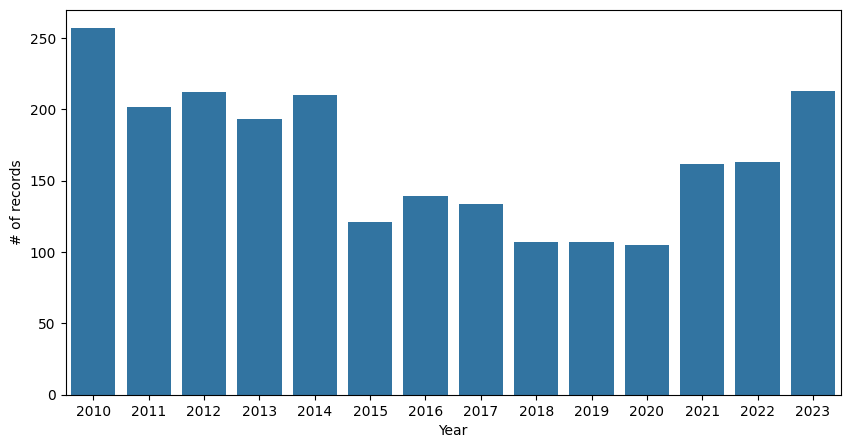

In [51]:
df_task_2b = df_task_2a
df_task_2b["Date"] = pd.to_datetime(df_task_2b["Date"])

plt.figure(figsize=(10, 5))
sns.countplot(x=df_task_2b["Date"].dt.year)

plt.xlabel('Year')
plt.ylabel('# of records')

# Display the plot
plt.show()

In [52]:
df_task_2b = df_task_2a

## **Task 2c: Identifying frequently failing `Weak Layers` for avalanches triggered by _'snowboarders'_ and _'skiers'_**

#### **Instructions**
1. **Identify Predominant `Publishers`:**
    - Determine the top publisher for `Racing` and `RPG` genres.
2. **Output:**
    - Note in markdown cell both the name of the publisher and number of games for each genre.

In [53]:
df_task_2b["Month"] = df_task_2a["Date"].apply(lambda time : time.month)

/var/folders/h_/r77nmr5n0yj0ltdrlgswkwnm0000gr/T/ipykernel_10586/2114872062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task_2b["Month"] = df_task_2a["Date"].apply(lambda time : time.month)


In [54]:
df_task_2b.head()




,Date,Region,Place,Trigger,Weak Layer,Depth_inches,Width_inches,Vertical_inches,Aspect,Elevation_feet,Year,Month
0,2012-11-09,Salt Lake,Sunset Peak,Snowboarder,New Snow/Old Snow Interface,14.0,960.0,360.0,North,10400.0,2012,11
1,2012-11-11,Salt Lake,Patsy Marly,Skier,New Snow/Old Snow Interface,30.0,1200.0,1200.0,North,9700.0,2012,11
2,2012-11-11,Salt Lake,Two Dogs,Skier,Facets,36.0,840.0,5400.0,North,10200.0,2012,11
3,2012-11-11,Salt Lake,Emma Ridges,Skier,New Snow,18.0,600.0,6000.0,Southeast,10200.0,2012,11
4,2012-11-11,Salt Lake,Sunset Peak,Skier,Facets,42.0,18000.0,9600.0,North,10400.0,2012,11


**Task 2c Notes:**

Note your answer here

## Task 3: Data Wrangling

### **Task 3a: Creating and assigning 'Avalanche Season'**

Next, we'll introduce a new categorical variable named `Avalanche Season` into our dataset. This addition aims to classify each avalanche record into different parts of the avalanche season (Start, Middle, End) based on the month it occurred in.

Create a new category `Avalanche Season` in the dataset and assign each record to `Start`, `Middle`, or `End` of the avalanche season based on its month.

#### **Instructions**
1. **Create New Variable:**
    - Add a new column `Avalanche Season` to the DataFrame.
2. **Assign Category:**
    - Using the `month` from the `Date` column assign proper values to the new category.
    - You should use the following ranges for assigning proper categories:
        - `Start` of Season for _October_, _November_, _December_
    	- `Middle` of Season for _January_, _February_, _March_
    	- `End` of Season for _April, May_, _June_
3. **Generate Dataframe:**
    - Save the modified DataFrame with the new `Avalanche Season` category to `df_task_3a`.
4. **Show Output:**
    - Display the head of `df_task_3a`.

In [59]:
def monthToSeason(month):
    if month in [10, 11,12]:
        return "Start"
    elif month in [1, 2, 3]:
        return "Middle"
    else:
        return "End"

df_task_3b = df_task_2b
df_task_3b["Season"] = df_task_2b["Month"].apply(monthToSeason)

/var/folders/h_/r77nmr5n0yj0ltdrlgswkwnm0000gr/T/ipykernel_10586/2741305865.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task_3b["Season"] = df_task_2b["Month"].apply(monthToSeason)


In [60]:
df_task_3b.head()

,Date,Region,Place,Trigger,Weak Layer,Depth_inches,Width_inches,Vertical_inches,Aspect,Elevation_feet,Year,Month,Season
0,2012-11-09,Salt Lake,Sunset Peak,Snowboarder,New Snow/Old Snow Interface,14.0,960.0,360.0,North,10400.0,2012,11,Start
1,2012-11-11,Salt Lake,Patsy Marly,Skier,New Snow/Old Snow Interface,30.0,1200.0,1200.0,North,9700.0,2012,11,Start
2,2012-11-11,Salt Lake,Two Dogs,Skier,Facets,36.0,840.0,5400.0,North,10200.0,2012,11,Start
3,2012-11-11,Salt Lake,Emma Ridges,Skier,New Snow,18.0,600.0,6000.0,Southeast,10200.0,2012,11,Start
4,2012-11-11,Salt Lake,Sunset Peak,Skier,Facets,42.0,18000.0,9600.0,North,10400.0,2012,11,Start


## **Task 3b: Analyzing Top Avalanche Trigger by Season**

Now we'll analyze which trigger is most prevalent for avalanches in each season phase (Start, Middle, End) using the `Avalanche Season` category created in Task 3a.

#### **Instructions**
1. **Analyze Triggers by Season:**
	- Determine the most common trigger for each season.
2. **Present Findings:**
	- Note in markdown cell both the name and frequency for each trigger.

**Answer**